Aquesta base de dades recull les dades relacionades amb la discapacitat de la persona

En aquesta base de dades ens hem trobat en què hi ha vàries entrades duplicades per ID però en les que hi ha diferents camps no omplerts en una i si en una altra, per la qual cosa hem deduït que el programa ha introduït una nova entrada quan s’han introduït nous camps i per tant hem unit les entrades per ID unint els valors faltants per als introduïts.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Dades Discapacitat.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

#seleccionem columnes
df=df[['acapp_dades_discapacitat_contactscontacts_ida','Té certificat CAD','% Grau Discapacitat','Temps CAD','On sordesa','Rep ajut econòmic?','Presenta pluridiscapacitat?','Tipus pluridiscapacitat','Pren medicació','Tipus de sordesa','Moment apareix sordesa','Quan inici pèrdua','Causa pèrdua auditiva','Porta audiòfon?','Porta implant coclear?','On implant coclear','Sistema de comunicació','Hospital o consulta que fa seguiment']]
#cambiar nom acapp_dades_discapacitat_contactscontacts_ida per ID
df.rename(columns={'acapp_dades_discapacitat_contactscontacts_ida':'ID'},inplace=True)



In [3]:
#a partir del diccionari creat anteriorment, cambiem la ID per tal d'evitar duplicats
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

,ID,Té certificat CAD,% Grau Discapacitat,Temps CAD,On sordesa,Rep ajut econòmic?,Presenta pluridiscapacitat?,Tipus pluridiscapacitat,Pren medicació,Tipus de sordesa,Moment apareix sordesa,Quan inici pèrdua,Causa pèrdua auditiva,Porta audiòfon?,Porta implant coclear?,On implant coclear,Sistema de comunicació,Hospital o consulta que fa seguiment
0,NaN,NaN,45.0,NaN,Unilateral OD,NaN,Sí,NaN,NaN,NaN,Prelocutiva,NaN,Genètica,Sí,No,NaN,Oral,NaN
1,19c7d363-71c1-f441-5e47-5e0dc5e4a1fd,Sí,34.0,Permanent,NaN,Sí,Sí,NaN,Sí,Neurosensorial,Prelocutiva,NaN,NaN,No,Sí,NaN,NaN,Hospital Sant Joan de Déu
2,73e5a12f-3169-8bb5-8181-60b8a4df5100,Sí,34.0,NaN,Biilateral,NaN,NaN,NaN,NaN,Neurosensorial,Prelocutiva,neixement,Desconeguda,No,Sí,Ambdues oïdes,Oral,NaN
3,c8a7044c-a15e-6426-be3a-5bf7c9e43700,NaN,74.0,NaN,NaN,NaN,Sí,NaN,NaN,NaN,Prelocutiva,Naixement,Adquirida,No,No,NaN,NaN,NaN
4,9b49d2b7-97eb-a44a-fe3a-5f7b14f2400d,Sí,78.0,NaN,Biilateral,NaN,NaN,NaN,NaN,Neurosensorial,Prelocutiva,NaN,Desconeguda,No,NaN,NaN,Signes,NaN


In [4]:
#nulls a ID
df['ID'].isnull().sum()

196

Eliminem entrades sense ID, ja que no podrem treballar amb elles

In [5]:
df = df.dropna(subset=["ID"])

In [6]:
#quantitat de duplicats a per la columna ID
df['ID'].duplicated().sum()

194

Ens trobem que hi ha forces entrades duplicades i valors faltants en diferents columnes però amb el mateix ID per la qual cosa procedima unir les files amb el mateix ID i omplir els valros faltants

In [7]:
#Unim les files duplicades per ID i omplir els valors faltants
df = df.groupby('ID').apply(lambda x: x.fillna(method='ffill')).reset_index(drop=True)


/tmp/ipykernel_13043/717289549.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('ID').apply(lambda x: x.fillna(method='ffill')).reset_index(drop=True)


In [8]:
#eliminem duplicats
df.drop_duplicates(subset='ID',keep='first',inplace=True)
df.head()

,ID,Té certificat CAD,% Grau Discapacitat,Temps CAD,On sordesa,Rep ajut econòmic?,Presenta pluridiscapacitat?,Tipus pluridiscapacitat,Pren medicació,Tipus de sordesa,Moment apareix sordesa,Quan inici pèrdua,Causa pèrdua auditiva,Porta audiòfon?,Porta implant coclear?,On implant coclear,Sistema de comunicació,Hospital o consulta que fa seguiment
0,19c7d363-71c1-f441-5e47-5e0dc5e4a1fd,Sí,34.0,Permanent,NaN,Sí,Sí,NaN,Sí,Neurosensorial,Prelocutiva,NaN,NaN,No,Sí,NaN,NaN,Hospital Sant Joan de Déu
1,73e5a12f-3169-8bb5-8181-60b8a4df5100,Sí,34.0,NaN,Biilateral,NaN,NaN,NaN,NaN,Neurosensorial,Prelocutiva,neixement,Desconeguda,No,Sí,Ambdues oïdes,Oral,NaN
2,c8a7044c-a15e-6426-be3a-5bf7c9e43700,NaN,74.0,NaN,NaN,NaN,Sí,NaN,NaN,NaN,Prelocutiva,Naixement,Adquirida,No,No,NaN,NaN,NaN
3,9b49d2b7-97eb-a44a-fe3a-5f7b14f2400d,Sí,78.0,NaN,Biilateral,NaN,NaN,NaN,NaN,Neurosensorial,Prelocutiva,NaN,Desconeguda,No,NaN,NaN,Signes,NaN
4,a740b955-6c2f-5dff-4aa5-5e0dc5afbb5a,No,0.0,Permanent,NaN,Sí,Sí,NaN,Sí,Neurosensorial,Perilocutiva,NaN,NaN,No,No,NaN,NaN,HSJD Dra Claveria


<AxesSubplot: title={'center': 'Dades incompletes a Dades Discapacitat'}>

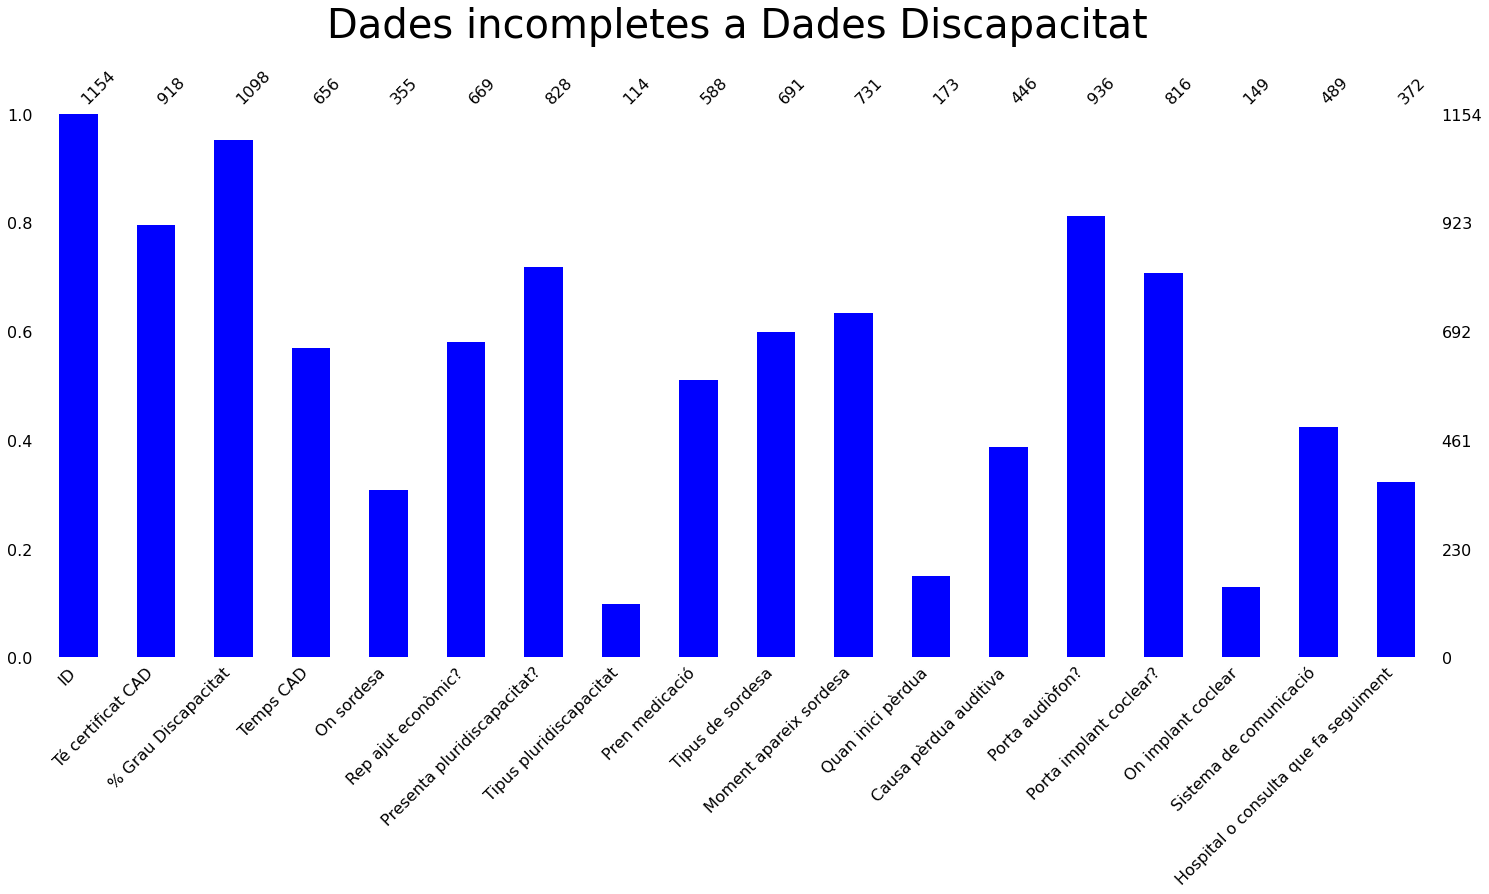

In [9]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Dades Discapacitat',fontsize=40, pad=30)
msno.bar(df, color='b')

En aquest cas ens trobem que hi ha moltes dades faltants que es deuen a que certa informació depèn de si presenta una característica prèvia o no. Per exemple el tipus de pluridiscapacitat només serà contestada per a personses que hagin contestat que si a si presenta pluridiscapacitat. És possible que altres dades incompletes es deguina que són preguntes no obligatòries o que la persona que introdueix les dades assumeix que no contestant es suposa que la resposta és negativa.

In [10]:
#pasar df_dades_discapacitat a csv
df.to_csv('dades_discapacitat_final.csv', index=False, encoding='utf-8')